<img style="float: right;" src="http://www2.le.ac.uk/liscb1.jpg">  
# Leicester Institute of Structural and Chemical Biology: Python for Biochemists
# Maximum Likelyhood
In general, there are two ways to do 'fitting'.  One way is where we want to fit our curve to some data points we've collected (see the notebooks on Curve Fitting and Minimization.)  The other way is to fit observations to a probablity distribution, which is generally done via a process called **Maximum Likelyhood**.  

This notebook is about maximum likelyhood is calculated.  Hopefully this will give users a better feel for the process.  For how to do this in the most common cases, see the notebook on *Fitting Distributions*.

## 1. Pick a distribution
Normally, one would choose the Normal distribution here - which can be a bit boring.  Instead, we'll use the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

In [1]:
from math import factorial, e

def poisson(x, lam):
    '''The Poisson distribution'''
    if (type(x) != int) or (type(lam) != int):
        raise ValueError('All values must be integers.')
    elif (x < 0) or (lam < 0):
        raise ValueError('All values must be non-negative.')
            
    return ((lam ** x) * (e ** -lam)) / factorial(x)

Now we can plot the distribution for several values of $\lambda$:

In [2]:
x_values = range(20)
lam_1 = [poisson(x, 1) for x in x_values]
lam_4 = [poisson(x, 4) for x in x_values]
lam_10 = [poisson(x, 10) for x in x_values]

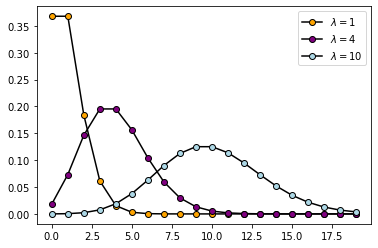

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(x_values, lam_1, marker='o', label='$\lambda = 1$', markerfacecolor='orange', color='black')
plt.plot(x_values, lam_4, marker='o', label='$\lambda = 4$', markerfacecolor='purple', color='black')
plt.plot(x_values, lam_10, marker='o', label='$\lambda = 10$', markerfacecolor='lightblue', color='black')
plt.legend();

## 2. Get some observations
In this case, we'll make up some data:

In [4]:
one_observation = [5]
two_observations = [5, 1]
three_observations = [5, 1, 5]

We can visualize the observations:

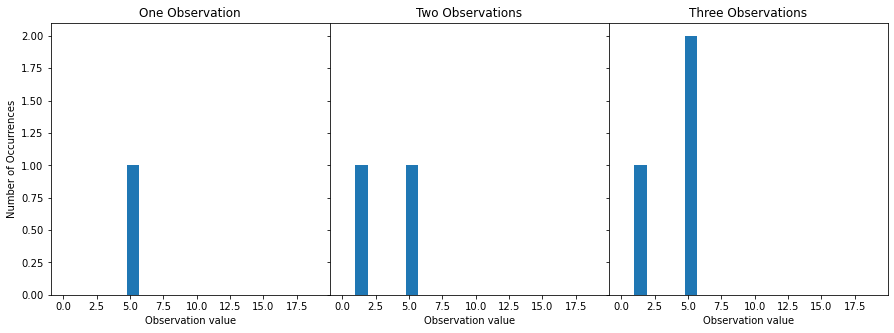

In [5]:
fig = plt.figure(figsize=(15, 5))
sp1, sp2, sp3 = fig.subplots(1,3,
                             sharey=True,
                             gridspec_kw={'wspace': 0})

sp1.hist(one_observation,
         range=(min(x_values), max(x_values)),
         bins=len(x_values),
        )
sp1.set_title('One Observation')
sp1.set_ylabel('Number of Occurrences')
sp1.set_xlabel('Observation value')

sp2.hist(two_observations,
         range=(min(x_values), max(x_values)),
         bins=len(x_values),
        )
sp2.set_title('Two Observations')
sp2.set_xlabel('Observation value')

sp3.hist(three_observations,
         range=(min(x_values), max(x_values)),
         bins=len(x_values),
        )
sp3.set_title('Three Observations')
sp3.set_xlabel('Observation value');

## 3. Calculate the likelyhood of observations for a given distribution
The likelyhood is simply the value of the distibution at a given observation.  This is much easier to see in code:

In [6]:
likelyhood = poisson(5, lam=1)
print(f'The likelyhood of making an observation at value 5 for a Poisson distribution with lambda 1 is {likelyhood}')

The likelyhood of making an observation at value 5 for a Poisson distribution with lambda 1 is 0.0030656620097620196


... and for more than one value:

In [7]:
lam = 1
for obs in two_observations:
    likelyhood = poisson(obs, lam=lam)
    print(f'The likelyhood of making an observation at value {obs} for a Poisson distribution with lambda {lam} is {likelyhood}')

The likelyhood of making an observation at value 5 for a Poisson distribution with lambda 1 is 0.0030656620097620196
The likelyhood of making an observation at value 1 for a Poisson distribution with lambda 1 is 0.36787944117144233


So the likelyhood of making an observation with value 1 is higher for a Poisson distribution with a $/lambda = 1$ than making an observation of value 5, matches our intuition if we just overlay the plots:

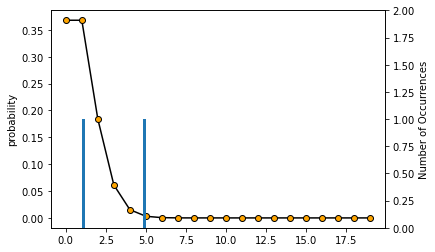

In [8]:
fig, ax1 = plt.subplots()

ax1.plot(x_values, lam_1, marker='o', label='$\lambda = 1$', markerfacecolor='orange', color='black')
ax1.set_ylabel('probability')

ax2 = ax1.twinx()
histogram = ax2.hist(two_observations, bins=len(x_values))
ax2.set_ylabel('Number of Occurrences')

ax2.set_ylim((0, 2*max(histogram[0])));

But to know what the likelyhood of making both observations together is, we need to *multiply* the likelyhoods together:

In [9]:
likelyhoods = [poisson(obs, lam=1) for obs in two_observations]

cumulative_likelyhood = 1
for likelyhood in likelyhoods:
    cumulative_likelyhood *= likelyhood
    
print(f'The cumulative likelyhood is {cumulative_likelyhood}')

The cumulative likelyhood is 0.0011277940269717726


## 3. Find the value of $\lambda$ that gives the maximum cumulative likelyhood


In [10]:
lambdas = range(1, 11)
cumulative_likelyhoods = []

for l in lambdas:
    likelyhoods = [poisson(obs, lam=l) for obs in two_observations]

    cumulative_likelyhood = 1
    for likelyhood in likelyhoods:
        cumulative_likelyhood *= likelyhood
        
    print(f'The cumulative likelyhood for lam={l} is {cumulative_likelyhood}')
    cumulative_likelyhoods.append(cumulative_likelyhood)

The cumulative likelyhood for lam=1 is 0.0011277940269717726
The cumulative likelyhood for lam=2 is 0.009768340740658231
The cumulative likelyhood for lam=3 is 0.015058419473248133
The cumulative likelyhood for lam=4 is 0.011450457699072412
The cumulative likelyhood for lam=5 is 0.005911449187823551
The cumulative likelyhood for lam=6 is 0.00238886976297401
The cumulative likelyhood for lam=7 is 0.0008152376856151312
The cumulative likelyhood for lam=8 is 0.00024583684034671234
The cumulative likelyhood for lam=9 is 6.744863054591528e-05
The cumulative likelyhood for lam=10 is 1.7176280186988e-05


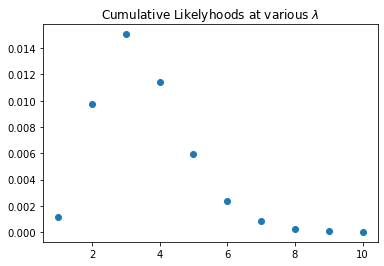

In [11]:
plt.plot(lambdas, cumulative_likelyhoods, linestyle='', marker='o')
plt.title('Cumulative Likelyhoods at various $\lambda$');

So, from this we can see that the value of $\lambda$ that gives the maximum cumulative likelyhood is 3.

## The problem with multiplication
One issue you may note is that, in order to accumulate the likelyhoods, you have to multiply the values together.  For a few data points, this is fine - but for hundreds or thousands, this means you're cumulative likelyhood gets very very tiny.  Because computers use digital representations of numbers, they don't handle very very tiny (or vary vary large) numbers well, and will start to behave as if those numbers are zero rather than really close to zero.  So instead of multiplying likelyhoods, you can take the logarithm, and then *sum log-likelyhoods*.  The code:

The cumulative log-likelyhood for lam=1 is -6.787491742782046
The cumulative log-likelyhood for lam=2 is -4.628608659422374
The cumulative log-likelyhood for lam=3 is -4.195818010773388
The cumulative log-likelyhood for lam=4 is -4.469725576062702
The cumulative log-likelyhood for lam=5 is -5.130864268177444
The cumulative log-likelyhood for lam=6 is -6.036934927413715
The cumulative log-likelyhood for lam=7 is -7.112030848450166
The cumulative log-likelyhood for lam=8 is -8.31084249270303
The cumulative log-likelyhood for lam=9 is -9.604144278764728
The cumulative log-likelyhood for lam=10 is -10.971981184817771


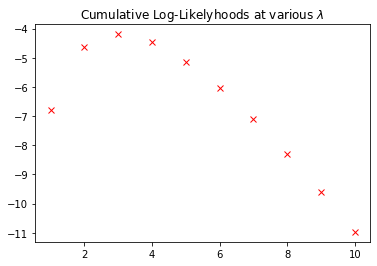

In [12]:
from math import log

lambdas = range(1, 11)
cumulative_log_likelyhoods = []

for l in lambdas:
    likelyhoods = [poisson(obs, lam=l) for obs in two_observations]
    log_likelyhoods = [log(l) for l in likelyhoods]
    cumulative_log_likelyhood = sum(log_likelyhoods)
    
    print(f'The cumulative log-likelyhood for lam={l} is {cumulative_log_likelyhood}')
    cumulative_log_likelyhoods.append(cumulative_log_likelyhood)

p = plt.plot(lambdas, cumulative_log_likelyhoods, linestyle='', marker='x', color='red')
plt.title('Cumulative Log-Likelyhoods at various $\lambda$');

For a sanity check, we can convert from the Log-Likelyhood back to the Likelyhood:

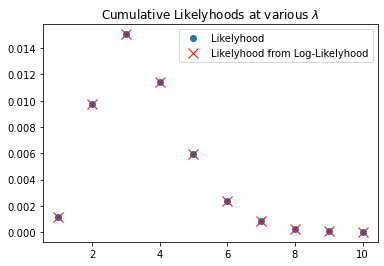

In [13]:
p = plt.plot(lambdas, cumulative_likelyhoods, linestyle='', marker='o', label='Likelyhood')

p = plt.plot(lambdas, [e**x for x in cumulative_log_likelyhoods], label='Likelyhood from Log-Likelyhood',
             linestyle='', marker='x', color='red', markersize=10)

plt.title('Cumulative Likelyhoods at various $\lambda$')
plt.legend();

This is why you will often see this called **Maximum Log-Likelyhood**.  In practice, we use one of the various minimization routines to find the parameters of the distribution that give us the minimum of the negative log-likelyhood (again, you can refer to the minimization notebooks here to see how to do that.) 